<img src="https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png" align="left"></img><br><br><br><br><br><br><br><br>


## Part 1 - Webscraping covid19 data

**Author List**: Deepankar Singh <br>
Site to scrape covid data: <br>
https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory

---
<a id='sec4'></a>
# Problem

Use BeautifulSoup and Requests or Pandas to scrape the table “COVID-19 pandemic by <br>
location” under Statistics / Total cases and deaths on this Wikipedia page: <br>
https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory

# Solution

In [30]:
import requests # The requests library is an 
# HTTP library for getting and posting content etc.
import bs4 as bs # BeautifulSoup4 is a Python library 
# for pulling data out of HTML and XML code.
# We can query markup languages for specific content
import pandas as pd
import numpy as np

In [31]:
source = requests.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory") 
# a GET request will download the HTML webpage.

In [32]:
# Convert source.content to a beautifulsoup object 
# beautifulsoup can parse (extract specific information) HTML code
soup = bs.BeautifulSoup(source.content, features='html.parser') 
# we pass in the source content
# features specifies what type of code we are parsing, 
# here 'html.parser' specifies that we want beautiful soup to parse HTML code

In [33]:
covid_data = soup.find(id='covid19-container')

In [34]:
covid_table = covid_data.find_all('table')[0]

In [35]:
df = pd.read_html(str(covid_table), header=0)[0]
df = df.drop(df.columns[[0,5]],axis=1)
df.columns=['country', 'cases', 'deaths','recovered']
df.head()

,country,cases,deaths,recovered
0,World[e],84644904,1837138,47659456
1,United States[f],20596260,353309,9223561
2,India,10305788,149218,9906387
3,Brazil,7716405,195742,6769420
4,Russia[g],3236787,58506,2618882


In [36]:
df['country'] = df['country'].str.replace(r"\[.*\]","")
df = df[df['country'] != 'World']
df = df.set_index('country')
df = df[:237]
df

,cases,deaths,recovered
country,,,
United States,20596260,353309,9223561
India,10305788,149218,9906387
Brazil,7716405,195742,6769420
Russia,3236787,58506,2618882
France,2643239,64921,195174
...,...,...,...
Wallis and Futuna,4,0,1
American Samoa,3,0,0
Samoa,2,0,0


#### Drop all the rows that do not contain numerical data

In [37]:
for col in df.columns:
 df = df[pd.to_numeric(df[col], errors='coerce').notnull()]
df

,cases,deaths,recovered
country,,,
United States,20596260,353309,9223561
India,10305788,149218,9906387
Brazil,7716405,195742,6769420
Russia,3236787,58506,2618882
France,2643239,64921,195174
...,...,...,...
Marshall Islands,4,0,2
Wallis and Futuna,4,0,1
American Samoa,3,0,0


#### Convert the datatype of all DataFrame values from objects to integers.

In [38]:
df = df.apply(pd.to_numeric) 
df

,cases,deaths,recovered
country,,,
United States,20596260,353309,9223561
India,10305788,149218,9906387
Brazil,7716405,195742,6769420
Russia,3236787,58506,2618882
France,2643239,64921,195174
...,...,...,...
Marshall Islands,4,0,2
Wallis and Futuna,4,0,1
American Samoa,3,0,0


#### Drop all rows of countries with zero recorded deaths or non-numeric death data.

In [39]:
df = df[ df['deaths'] != 0]
df

,cases,deaths,recovered
country,,,
United States,20596260,353309,9223561
India,10305788,149218,9906387
Brazil,7716405,195742,6769420
Russia,3236787,58506,2618882
France,2643239,64921,195174
...,...,...,...
Northern Mariana Islands,122,2,32
British Virgin Islands,72,1,70
Fiji,49,2,44


#### Create a new column called cases_per_deaths and assign it the value of number of cases divided by deaths.

In [40]:
df = df.assign(cases_per_deaths =  df['cases'] // df['deaths'])
df

,cases,deaths,recovered,cases_per_deaths
country,,,,
United States,20596260,353309,9223561,58
India,10305788,149218,9906387,69
Brazil,7716405,195742,6769420,39
Russia,3236787,58506,2618882,55
France,2643239,64921,195174,40
...,...,...,...,...
Northern Mariana Islands,122,2,32,61
British Virgin Islands,72,1,70,72
Fiji,49,2,44,24


In [41]:
#### Sort the DataFrame so that the countries with the highest number of cases_per_deathscome first. 
#### Print the first 20 rows of your sorted DataFrame

In [42]:
df = df.sort_values(by='cases_per_deaths', ascending=False)
df[:20]

,cases,deaths,recovered,cases_per_deaths
country,,,,
Singapore,58662,29,58476,2022
Mongolia,1215,1,830,1215
USS Theodore Roosevelt,1102,1,751,1102
Qatar,144437,245,141808,589
Eritrea,1320,3,676,440
Burundi,760,2,687,380
Gibraltar,2212,6,1249,368
United Arab Emirates,213231,679,189709,314
Botswana,12340,40,11627,308


###### If the number of cases per death is lower,then there is higher changes of person dying if they get covid in such countries. Also countries with high cases per dealth have a better healthcare system since they have lower deaths as compared to people dying.

#### Part 2 - Exploring prediction algorithms on covid19 data

###### Load the CSV on this URL https://covid.ourworldindata.org/data/ecdc/total_deaths.csv into a Pandas DataFrame. 
###### It has data until the end of November (otherwise drop all data after November 29 2020).

In [44]:
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
plt.style.use('classic')

In [45]:
data = pd.read_csv('total_deaths.csv')
data['date'] = pd.to_datetime(data['date'])
data = data.replace(np.nan, 0)
data

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-11-25,1410788.0,1725.0,735.0,2309.0,76.0,337.0,0.0,4.0,37432.0,...,605.0,0.0,0.0,876.0,35.0,0.0,1.0,609.0,357.0,274.0
331,2020-11-26,1423371.0,1737.0,743.0,2329.0,76.0,338.0,0.0,4.0,37701.0,...,606.0,0.0,0.0,880.0,35.0,0.0,1.0,611.0,357.0,274.0
332,2020-11-27,1434009.0,1737.0,753.0,2352.0,76.0,340.0,0.0,4.0,37941.0,...,607.0,0.0,0.0,880.0,35.0,0.0,1.0,612.0,357.0,274.0
333,2020-11-28,1444342.0,1752.0,771.0,0.0,76.0,0.0,0.0,4.0,38203.0,...,607.0,0.0,0.0,884.0,35.0,0.0,1.0,614.0,357.0,275.0


#### 1. Plot the total number of deaths over time globally.

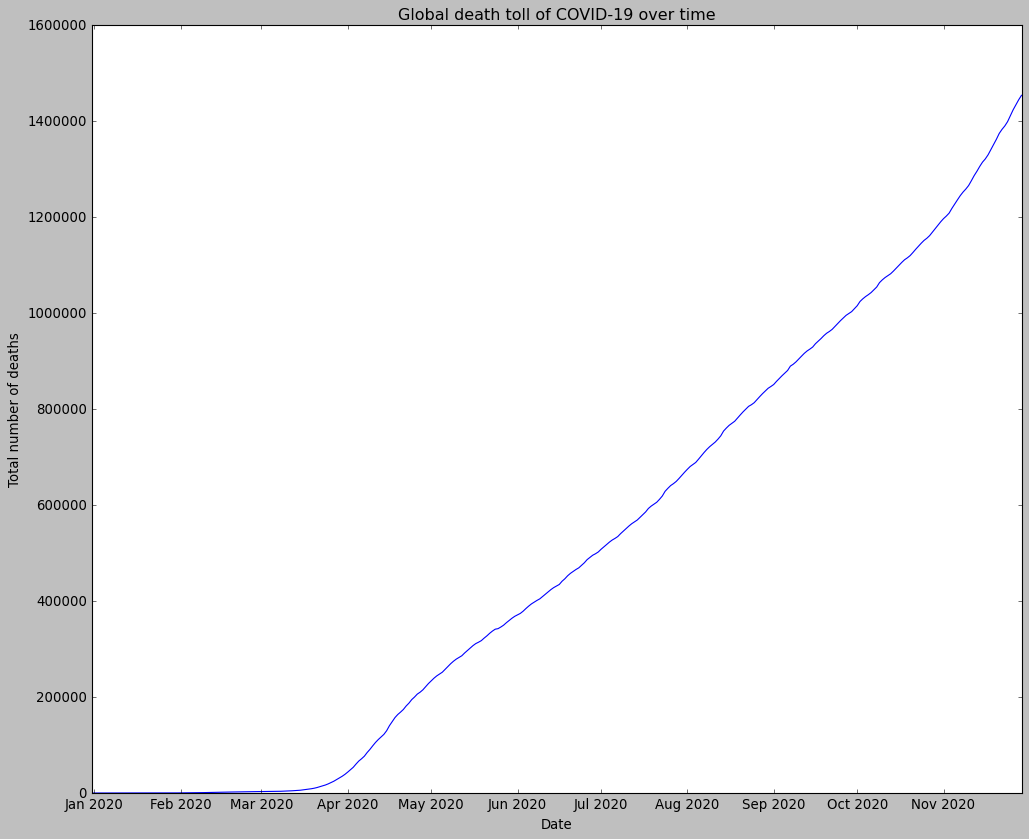

In [46]:
plt.figure(figsize=(15, 12))
x = np.array(data['date'])
y = np.array(data['World'])
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Total number of deaths')
plt.title('Global death toll of COVID-19 over time')
plt.show()

#### 2. Use scikit-learn to train a Simple Linear Regression model predicting the number ofglobal coronavirus deaths over the time period in the data set. Fill all NaN values with 0.
#### Plot the predictions of the model in a graph together with the true number of cases.

In [47]:
ord_date = data['date'].map(dt.datetime.toordinal)
X = np.array(ord_date).reshape(-1,1)
Y = data['World']
lr = LinearRegression()
lr.fit(X,Y)
pred = lr.predict(X)

Text(0.5, 1.0, 'Comprision between predictions from a linear regression and the actual gloabla death toll of COVID-19')

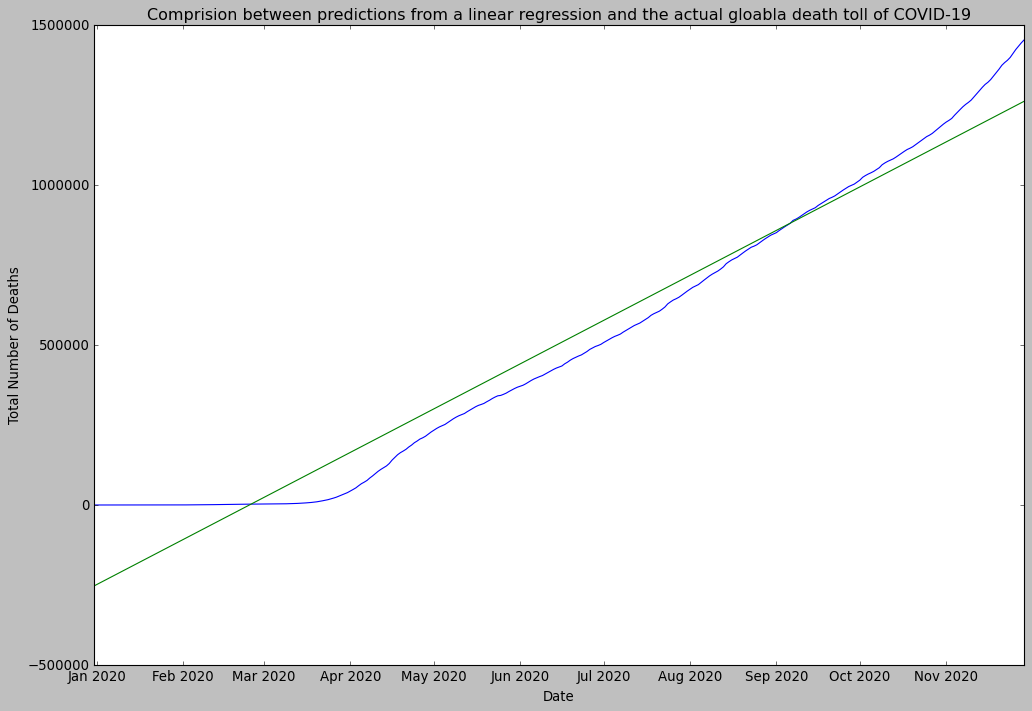

In [48]:
plt.figure(figsize=(15, 10))
plt.plot(data['date'],data['World'])
plt.plot(data['date'],pred)
plt.xlabel('Date')
plt.ylabel('Total Number of Deaths')
plt.title('Comprision between predictions from a linear regression and the actual gloabla death toll of COVID-19')

#### 3. Print the mean squared error of your Linear Regression model (as compared to the realvalues in the model training data for the whole time period).

In [49]:
print("MSE for Linear Regression model {}".format(mean_squared_error(pred, data['World'])))

MSE for Linear Regression model 7944480123.264536


#### 4. Train any Regression model of your choice on the number of COVID19 deaths in South Korea.
Use data from the date of the first death up to November 22nd as your training set. Your
test set will contain the data from November 23rd to November 29th (7 days in total).
Use your model to predict the number of deaths in South Korea for the seven days
in the test set (not included in your training set) .
Plot the predictions together with the actual recorded deaths for the dates November
23rd to November 29th, see example plot below.
Print the Mean Squared Error (MSE) of your test set predictions. Full credit is given if
your model has a lower MSE than 53.2.

In [50]:
sk = data[['date','World','South Korea']]

train = sk[sk['date'] < dt.datetime(2020, 11, 23)]
train = train[ sk['South Korea'] > 0.0 ]

test = sk[sk['date'] > dt.datetime(2020, 11, 22)]

train = train.assign(rest =  train['World'] - train['South Korea'])
test = test.assign(rest =  test['World'] - test['South Korea'])

train = train.drop(['date', 'World'], axis='columns')
test = test.drop(['date', 'World'], axis='columns')

train['date_num'] = np.array([i for i in range(train.shape[0])])
test['date_num'] = np.array([i for i in range(train.shape[0], train.shape[0]+7, 1)])

train

<ipython-input-50-c2a5661943c4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = train[ sk['South Korea'] > 0.0 ]


,South Korea,rest,date_num
52,1.0,2246.0,0
53,2.0,2357.0,1
54,5.0,2458.0,2
55,7.0,2612.0,3
56,8.0,2690.0,4
...,...,...,...
323,496.0,1339809.0,271
324,498.0,1350895.0,272
325,501.0,1361602.0,273
326,503.0,1373594.0,274


In [51]:
# X = np.array([i for i in range(train.shape[0])])
# train.drop(['date', 'World'], axis='columns')
X = train.drop(['South Korea','rest'], axis='columns')
Y = train['South Korea']
X

,date_num
52,0
53,1
54,2
55,3
56,4
...,...
323,271
324,272
325,273
326,274


In [54]:
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=200)
model = Sequential()
model.add(Dense(2048, activation= "relu"))
model.add(Dense(1024, activation= "relu"))
model.add(Dense(512, activation= "relu"))
model.add(Dense(256, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(16, activation= "relu"))
model.add(Dense(8, activation= "relu"))
model.add(Dense(4, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X, Y, epochs=2500, batch_size=200, callbacks=[early_stopping], verbose=0)

In [56]:
model.fit(X, Y, epochs=2500, batch_size=200, callbacks=[early_stopping], verbose=0)

In [57]:
pred_train= model.predict(X)
print(np.sqrt(mean_squared_error(Y,pred_train)))

pred = model.predict(np.array([i for i in range(train.shape[0], train.shape[0]+7, 1)]))
print(mean_squared_error(test['South Korea'],pred))

4.6464667823169075
27.93599642932947


In [58]:
test['South Korea'],model.predict([275,276,277,278,279,280,281])

(328    509.0
 329    510.0
 330    513.0
 331    515.0
 332    516.0
 333    522.0
 334    523.0
 Name: South Korea, dtype: float64,
 array([[502.94925],
        [504.8097 ],
        [506.66998],
        [508.53036],
        [510.3907 ],
        [512.2511 ],
        [514.1115 ]], dtype=float32))